In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import sympy
from sklearn.model_selection import train_test_split
from sklearn import linear_model


In [54]:
df = pd.DataFrame({
    'A': [  0,     1,   2,   3,   4,   5,   6,   7,   8,    9, 10,   11,   12, 13, 14  ],
    'B': [9.1,   7.3, 3.2, 4.6, 4.8, 2.9, 5.7, 7.1, 8.8, 10.2, 20, 15.7, 30.1, 24, 49.6]
})
X = pd.concat([df['A'], df['A'].apply(lambda t : t**2).rename('A2'), df['A'].apply(lambda t : t**3).rename('A3'), df['A'].apply(lambda t : t**4).rename('A4')], axis = 1)
y = df['B']

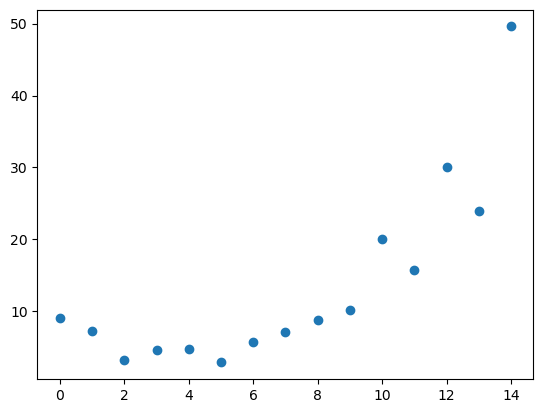

In [55]:
plt.scatter(df['A'], df['B'])

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .25)

In [57]:
# These are variables used to plot
t = np.linspace(0, 14, 100)
x = np.array([t, t**2, t**3, t**4])

In [58]:
lr = linear_model.LinearRegression().fit(X_train, y_train)
y_hat_RSS = lr.intercept_ + np.inner(lr.coef_, x.transpose())

In [59]:
# We're going to use cross validation to find the "best" alpha
alpha_range = np.logspace(-6, 6, 13)
alpha_range

array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06])

In [60]:
# We'll use RidgeCV and LassoCV to find the best alphas to use
ridge = linear_model.RidgeCV(alphas = alpha_range).fit(X_train, y_train)
lasso = linear_model.LassoCV(alphas = alpha_range).fit(X_train, y_train)

ridge_alpha, lasso_alpha = ridge.alpha_, lasso.alpha_


c:\Users\RobDewan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.42282907004799, tolerance: 0.18003587500000004
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\RobDewan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.869028193472822, tolerance: 0.18003587500000004
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\RobDewan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.395421064449444, tolerance: 0.18003587500000004
  model = cd_fast.enet_coordinate_descent_gram(
c:\Users\RobDewan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinat

In [61]:
ridge_alpha, lasso_alpha

(1000000.0, 100.0)

In [62]:
ridge = linear_model.Ridge(alpha = ridge_alpha).fit(X_train, y_train)
lasso = linear_model.Lasso(alpha = lasso_alpha).fit(X_train, y_train)

y_hat_ridge = ridge.intercept_ + np.inner(ridge.coef_, x.transpose())
y_hat_lasso = lasso.intercept_ + np.inner(lasso.coef_, x.transpose())

In [63]:
scores = lr.score(X_test, y_test), ridge.score(X_test, y_test), lasso.score(X_test, y_test)
print(scores)

(0.10726822847105777, 0.043621526857664406, 0.04155484034787926)


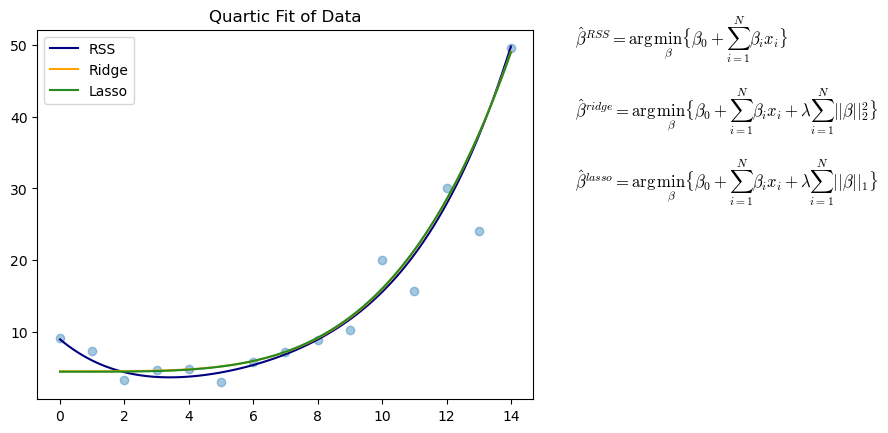

In [64]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.scatter(df['A'], df['B'], alpha = .40)
plt.plot(t, y_hat_RSS, color = 'navy', label = 'RSS')
plt.plot(t, y_hat_ridge, color = 'orange', label = 'Ridge')
plt.plot(t, y_hat_lasso, color = 'forestgreen', label = 'Lasso')
plt.text(16, 50, r'$ \hat{\beta}^{RSS} = \arg\min_{\beta} \{\beta_{0} + \sum_{i=1}^{N}{\beta_{i} x_{i}} \}$', size =12)
plt.text(16, 40, r'$ \hat{\beta}^{ridge} = \arg\min_{\beta} \{\beta_{0} + \sum_{i=1}^{N}{\beta_{i} x_{i}} + \lambda \sum_{i=1}^{N}{||\beta}||_{2}^{2} \}$', size = 12)
plt.text(16, 30, r'$ \hat{\beta}^{lasso} = \arg\min_{\beta} \{\beta_{0} + \sum_{i=1}^{N}{\beta_{i} x_{i}} + \lambda \sum_{i=1}^{N}{||\beta}||_{1} \}$', size = 12)
plt.title("Quartic Fit of Data")
plt.legend();


In [65]:
lr.coef_, ridge.coef_, lasso.coef_

(array([-3.75528997e+00,  8.78766282e-01, -8.12215062e-02,  3.75095734e-03]),
 array([-2.31295456e-05, -1.28444891e-04, -5.82422270e-04,  1.20349442e-03]),
 array([-0.        , -0.        , -0.        ,  0.00116024]))